# **Installing External Libraries & Download Resources**

---



In [0]:
from google.colab import drive 
drive.mount('/content/drive')       # Mounting Folder from GDrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install --upgrade gensim      # gensim - opensource library for NLP and IR
! pip install symspellpy            # symspellpy - Fast spelling correction
! pip install neuralcoref           # Neuralcoref - Anaphora Resolution
! pip install spacy==2.1.0          # Spacy 2.1.0 is compatible with neuralcoref

     |████████████████████████████████| 24.2MB 1.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 2.6MB 2.7MB/s 
     |████████████████████████████████| 296kB 2.8MB/s 
     |████████████████████████████████| 27.7MB 152kB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 3.2MB 59.7MB/s 
     |████████████████████████████████| 2.1MB 45.5MB/s 
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.1.0 which is incompatible.
  Found existing installation: preshed 3.0.2
    Uninstalling preshed-3.0.2:
      Successfully uninstalled preshed-3.0.2
  Found existing installation: plac 1.1.3
    Uninstalling plac-1.1.3:
      Successfully uninstalled plac-1.1.3
  Found existing installation: blis 0.4.1
    Uninstalling blis-0.4.1:
      Successfully uninstalled blis-0.4.1
  Found existing installation: thin

# **Import Required Libraries**

---







In [0]:
import warnings
warnings.filterwarnings("ignore")

from    tqdm            import tqdm             # tqdm for loops
import  json                                    # json for Loading data
import  nltk                                    # nltk for Document Segmentation
import  nltk.data                               # nltk.data for Loading NLTK Resource Files
import  spacy                                   # spacy for Stopword Removal, Lemmatization & Anaphora Resolution
import  neuralcoref                             # Anaphora Resolution
import  os.path                                 # os.path for file navigation
from    nltk.tokenize   import TreebankWordTokenizer              
#######                                         # nltk.tokenize for Word Tokenization

import  re                                      # re for Number Removal
from    nltk.stem       import WordNetLemmatizer # nltk.stem for Lemmatization
from    textblob        import TextBlob         # textblob for PoS tagging
from    nltk.corpus     import wordnet          # wordnet for PoS Definition
import  pkg_resources                           # pkg_resources to find and manage Python package/version
from    symspellpy      import SymSpell, Verbosity  # symspellpy forSpelling Correction

import  itertools                               # itertools for Final Preprocessing
from gensim.models.phrases import Phrases, Phraser  # For n-gram

##-------VSA------##
import numpy as np
from    gensim.models   import TfidfModel       # TfidfModel for Vector Space Model
from    gensim.corpora  import Dictionary       # gensim.corpora for Document-Term matrix
from gensim.models import Word2Vec, WordEmbeddingSimilarityIndex
from gensim.similarities import SoftCosineSimilarity, SparseTermSimilarityMatrix

##------ESA------##
from gensim import utils
import gensim.downloader as api
from gensim.models import KeyedVectors
# import json
import  pandas as pd

##------LSA------##
from    gensim          import corpora          # ???
from    gensim.models   import LsiModel         # LSIModel for LSA Algorithm
from    gensim.models.coherencemodel   import CoherenceModel # ??? CoherenceModel for Extracting optimum no. of articles (K)
import  matplotlib.pyplot as plt
##------LDA------##
from    gensim.models   import LdaModel         # LSIModel for LSA Algorithm

##------Similarity Measdures------##
from    gensim          import similarities     # Cosine Similarity
from    gensim.matutils import cossim           # Cosine Similarity
from    gensim.matutils import softcossim       # Soft-Cosine Similarity
from    gensim.matutils import hellinger        # Hellinger Distance
from    gensim.matutils import jaccard          # Jaccard Distance
from    gensim.matutils import jensen_shannon   # jensen_shannon Distance
from six import iteritems, itervalues
from math import*

##------Page_Rank------##
from    gensim.summarization.keywords           import get_graph            # ???
from    gensim.summarization.pagerank_weighted  import pagerank_weighted    # ???

##------BM25 Ranking-------------##
from gensim.summarization.bm25 import BM25
##----------Evaluation-----------##
#from sklearn.metrics import ndcg_score
import math
##------Hypothesis Testing-------##
import seaborn as sns
from numpy.random import seed
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
##----------Correlation----------##
import statistics
from scipy.stats import pearsonr
import seaborn as sns
##------Download_nltk_Resources------##
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
##------Download_spacy_Resources-----##
! python -m spacy download en       # Download English dictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


# **Importing Cranfield dataset**
---



In [0]:
dataset_path        = "drive/My Drive/NLP/Project/Dataset/cranfield/"              # This is the path to the Cranfield training dataset saved in Gdrive
##------Reading the documents in the Dataset------##

docs_json           = json.load(open(dataset_path + "cran_docs.json", 'r'))[:]                  # Loading the .json file of 1400 Cranfield documents
doc_ids, docs       = [doc["id"] for doc in docs_json], [doc["body"] for doc in docs_json]      # Separting into Document ID and Document text

queries_json        = json.load(open(dataset_path + "cran_queries.json", 'r'))[:]                               # Loading the .json file of 225 queries
query_ids, queries  = [quer["query number"] for quer in queries_json], [quer["query"] for quer in queries_json] # Separting into Query ID and Query text

# **Preprocessing**

---



#### **Step 1**: Uppercase to Lowercase


In [0]:
def case_insensitive(text):
    text = text.lower()
    return text

#### **Step 2**: Anaphora Resolution

In [0]:
def coreference(text):

    nlp = spacy.load('en')
    neuralcoref.add_to_pipe(nlp)
    doc = nlp(text)
    doc = doc._.coref_resolved
    return doc

#### **Step 3**: Document Segmentation



In [0]:
def punkt_tokenize(text):
    """
        Function for tokenizing a document into Sentences
        input:      Takes a string
        output:     Returns a list of separate sentence strings
    """
    model = nltk.data.load('tokenizers/punkt/english.pickle')     # Loading a pre-trained Punkt tokenizer for English
    segmentedText = model.tokenize(text.strip())                  # Tokenize the document into sentences
    return segmentedText

#### **Optional Step 3.3**: N-Gram

In [0]:
def nGram(sent_tokens):
    bigram = Phrases(sent_tokens, min_count = 2, threshold = 2, delimiter = b' ')
    bigram_phraser = Phraser(bigram)
    bigram_tokens = []
    for sent in sent_tokens:
        bigram_tokens.append(bigram_phraser[sent])

    return bigram_tokens

#### **Step 4**: Spelling Correction, Word Tokenization, REMOVAL of Punctuations, WhiteSpaces, Numbers, Special Characters and StopWords



In [0]:
##------Spelling Correction Model------##
"""
    PARAMETERS:-
    max_dictionary_edit_distance        : (int) Maximum edit distance for doing lookups
    prefix_length                       : (int) The length of word prefixes used for spell checking
    frequency_dictionary_en_82_765.txt  : Text file containing ???
    frequency_dictionary_en_243_342.txt : Text file containing ???
"""
sym_spell       = SymSpell(max_dictionary_edit_distance = 2, prefix_length = 7)     # Creating a Spell correction Object
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")  
bigram_path     = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

sym_spell.load_dictionary(dictionary_path, term_index = 0, count_index = 1)         # Loading the Unigram Dictionary
sym_spell.load_bigram_dictionary(bigram_path, term_index = 0, count_index = 2)      # Loading the Bigram  Dictionary

##------Stop Word Model-----##
spacy_nlp       = spacy.load('en_core_web_sm')                                      # Loading the model of StopWord removal
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS                               # Storing list of stopwords: https://raw.githubusercontent.com/explosion/spaCy/master/spacy/lang/en/stop_words.py
#----------------------------------------------------------------------------------------------------------#

def clean_text(text, sym_spell, spacy_stopwords, ngram_cond):
    """
    Function for parsing through the document sentences and generating cleaned tokens.
    INPUT       :   Takes a list of separate sentence strings
    OUTPUT      :   Returns a list of sentences which is a list of tokens for a document
    PARAMETERS  :
        MAX_EDIT_DIST -- The Maximum edit distance parameter controls up to which edit distance words from the dictionary should be treated as suggestions.
    """
    MAX_EDIT_DIST   = 2
    tokenizedText   = []      # Empty list for storing sentences of tokenized words
    fin_tokenizedText = []

    for sentence in text:
        sentence    = sym_spell.lookup_compound(sentence, max_edit_distance = MAX_EDIT_DIST)[0].term    # Spelling Correction
        token_words = TreebankWordTokenizer().tokenize(sentence)                                        # Tokenizing the sentence into individual words
        tokenizedText.append(token_words)                                                               # The tokens are then stored in a list
    
    if (ngram_cond == True):                                                                            # n-gram formulation
            ngram_text = nGram(tokenizedText)
    else:
            ngram_text = tokenizedText
    
    for tok_words in ngram_text:
        tok_words = [word for word in tok_words if (word.isalnum() and word.isalpha())]             # Only considering tokens with ALPHABETS
        tok_words = [word for word in tok_words if word not in spacy_stopwords]                     # Stop word removal
        fin_tokenizedText.append(tok_words)

    return fin_tokenizedText

#### **Step 5**: Part of Speech Tagging and Lemmatization



In [0]:
def lemmatization(text):
    """
    Function for word lemmatization.
    INPUT       :   Takes a list of sentences which is a list of tokenis for a document
    OUTPUT      :   Returns a list of sentences which is a list of lemmataized tokens for a document
    """
    reducedText = []                    # Empty list for storing sentences of lemmatized words
    lemmatizer = WordNetLemmatizer()    # Creating a WordNet lemmatization object

    for tokens in text:
        lem_word = []
        for word in tokens:
            pos_tag = TextBlob(word)
            if (pos_tag.tags):
                if   (pos_tag.tags[0][1][0] == 'J'):
                    lem_word.append(lemmatizer.lemmatize(pos_tag.tags[0][0], pos = wordnet.ADJ ))
                elif (pos_tag.tags[0][1][0] == 'N'):
                    lem_word.append(lemmatizer.lemmatize(pos_tag.tags[0][0], pos = wordnet.NOUN))
                elif (pos_tag.tags[0][1][0] == 'R'):
                    lem_word.append(lemmatizer.lemmatize(pos_tag.tags[0][0], pos = wordnet.ADV ))
                elif (pos_tag.tags[0][1][0] == 'V'):
                    lem_word.append(lemmatizer.lemmatize(pos_tag.tags[0][0], pos = wordnet.VERB))
                else:
                    lem_word.append(word)

        reducedText.append(lem_word)
    return reducedText

#### **Step 6**: Function for preprocessing


In [0]:
def preprocess_data(documents, sym_spell, spacy_stopwords, prep_token_docs = [], prep_sent_docs = [], cond = False):
    """
    Function which calls all the previous pre-processing functions in sequence.
    INPUT :-   
        documents :         [list] 
                The list documents from the dataset, each document is a string
        sym_spell :         [object]
                A symspell model object for spelling correction
        spacy_stopwords:    [list]
                List of English stopwords in spacy package
        prep_token_docs:    [list]
            (Empty) list for storing the document as pre-processed word tokens
        prep_token_docs:    [list]
            (Empty) list for storing the document as pre-processed sentences

    OUTPUT      :   Returns a list of sentences which is a list of lemmataized tokens for a document
    """
    for doc in tqdm(documents):
        doc = case_insensitive(doc)                                # Step 1
        doc = coreference(doc)                                     # Step 2
        doc = punkt_tokenize(doc)                                  # Step 3
        doc = clean_text(doc, sym_spell, spacy_stopwords, cond)    # Step 4
        doc = lemmatization(doc)                                   # Step 5
        prep_token_docs.append(doc)
    
    for prep_doc in tqdm(prep_token_docs):
        prep_sent_docs.append(list(itertools.chain.from_iterable(prep_doc)))

    return prep_token_docs, prep_sent_docs

#### **Testing**

In [0]:
# unigram
_, prep_sent_docs_unigram      = preprocess_data(docs, sym_spell, spacy_stopwords, [], [], False)         # Preprocessing the Cranfield Documents
_, prep_sent_queries_unigram   = preprocess_data(queries, sym_spell, spacy_stopwords, [], [], False)      # Preprocessing the Queries

100%|██████████| 225/225 [00:00<00:00, 298739.60it/s]


In [0]:
n_doc_unigram = len(prep_sent_docs_unigram)
prep_sent_docs_unigram.extend(prep_sent_queries_unigram)        # Combined the query at the end of the document list
print(len(prep_sent_docs_unigram))

1625


In [0]:
# ngram
_, prep_sent_docs_ngram      = preprocess_data(docs, sym_spell, spacy_stopwords, [], [], True)         # Preprocessing the Cranfield Documents
_, prep_sent_queries_ngram   = preprocess_data(queries, sym_spell, spacy_stopwords, [], [], True)      # Preprocessing the Queries

In [0]:
n_doc_ngram = len(prep_sent_docs_ngram)
prep_sent_docs_ngram.extend(prep_sent_queries_ngram)        # Combined the query at the end of the document list
print(len(prep_sent_docs_ngram))

# **Corpus Function**

In [0]:
def prepare_corpus(prep_sent_docs):
    """
        Function for preparing the dictionary and corpus of the documents in Dataset
    INPUT       : Pre-processed list of documents, each document is a list of sentences, and each sentence is a list of tokens
    OUTPUT      : A dictionary and a corpus associated with the input document dataset
    """
    dictionary  = Dictionary(prep_sent_docs)    
    corpus      = [dictionary.doc2bow(doc) for doc in prep_sent_docs]        # convert corpus to Bag of Word format
    return dictionary, corpus

In [0]:
def term_similarity(prep_sent_docs):

    word2vec_model = Word2Vec(prep_sent_docs, size = 1625, min_count = 1) 
    termsim_index = WordEmbeddingSimilarityIndex(word2vec_model.wv)
    dictionary, bow_corpus = prepare_corpus(prep_sent_docs)
    similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)  # construct term similarity matrix

    return similarity_matrix

# **Ranking Metrics**

------------

#### **Cosine Similarity**

In [0]:
def cosine_similarity(doc_corpus, query_corpus):

  query_sim = []
  for q_corp in tqdm(query_corpus):

      doc_sim = []
      for d_corp in doc_corpus:
          doc_sim.append(cossim(q_corp, d_corp))

      query_sim.append(doc_sim)
  return query_sim

#### **Soft Cosine Similarity**

In [0]:
def soft_cosine_similarity(wiki_similarity, doc_corpus, query_corpus):
  
  query_sim = []
  for q_corp in tqdm(query_corpus):

      doc_sim = []
      for d_corp in doc_corpus:
          doc_sim.append(softcossim(q_corp, d_corp, wiki_similarity))

      query_sim.append(doc_sim)
  return query_sim

####**Jaccard Distance**

In [0]:
def jaccard_distance(doc_corpus, query_corpus):
  
  query_sim = []
  for q_corp in tqdm(query_corpus):

      doc_sim = []
      for d_corp in doc_corpus:
          doc_sim.append(jaccard(q_corp, d_corp))

      query_sim.append(doc_sim)
  return query_sim

# **Rank - Save**

---

In [0]:
def sim_ranking(score, CUTOFF, query_id, doc_id, n, boolean):

    rank = []
    for i in tqdm(range(len(query_id))):
        df = pd.DataFrame(list(zip(doc_id, score[i][:n])), columns = ['Doc-ID', 'sim'])
        df.sort_values(by = ['sim'], ascending = boolean, inplace = True)
        df = df.head(CUTOFF)
        for d_id, sim in zip(df['Doc-ID'], df['sim']):
            rank.append({'query_num': query_id[i], 'id': d_id, 'relatedness': sim})

    return rank

In [0]:
def Save_Result(rank, output_file):

    with open('drive/My Drive/NLP/Project/ESA/Results/'+output_file+'.json', 'w', encoding = 'utf-8') as f:
        json.dump(rank, f, ensure_ascii = False, indent = 4)

# **Vector Space Association model (VSA)**

---



#### **Step 1:** Define VSA Model

In [0]:
def VSAModel(prep_sent_docs):
    """
        Function for loading the tf-IDF model
    INPUT       : Pre-processed list of documents, each document is a list of sentences, and each sentence is a list of tokens
    OUTPUT      : A Vector Space tf-IDF model for the given corpus
    """
    dictionary, vsa_corpus = prepare_corpus(prep_sent_docs)
    # Generate Vector Space Model
    vsamodel    = TfidfModel(corpus = vsa_corpus, dictionary = dictionary, normalize = True, smartirs = 'ntu')
    return vsamodel

In [0]:
#----------------------------------#
vsa_model_unigram = VSAModel(prep_sent_docs_unigram)                            # Calling the Unigram VSA model
#----------------------------------#
vsa_model_ngram = VSAModel(prep_sent_docs_ngram)                      # Calling the n-gram VSA model

#### **Step 2:** Generate Similarity Score

In [0]:
# For VSA Model
_, text_corpus_unigram = prepare_corpus(prep_sent_docs_unigram)
_, text_corpus_ngram = prepare_corpus(prep_sent_docs_ngram)

len(text_corpus_unigram), len(text_corpus_ngram)

In [0]:
# Cosine Similarity
vsa_cos_unigram = cosine_similarity(vsa_model_unigram[text_corpus_unigram], vsa_model_unigram[text_corpus_unigram[n_doc_unigram:]])
vsa_cos_ngram = cosine_similarity(vsa_model_ngram[text_corpus_ngram], vsa_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(vsa_cos_unigram[0]), len(vsa_cos_ngram[0])

100%|██████████| 225/225 [01:32<00:00,  2.44it/s]


(1625, 1625)

In [0]:
# Jaccard Distance
vsa_jacc_unigram = jaccard_distance(vsa_model_unigram[text_corpus_unigram], vsa_model_unigram[text_corpus_unigram[n_doc_unigram:]])
vsa_jacc_ngram = jaccard_distance(vsa_model_ngram[text_corpus_ngram], vsa_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(vsa_jacc_unigram[0]), len(vsa_jacc_ngram[0])

100%|██████████| 225/225 [01:30<00:00,  2.49it/s]


(1625, 1625)

#### **Step 3:** Rank & Save the result

In [0]:
# rank all the result based on metrics
vsa_cos_rank_unigram = sim_ranking(vsa_cos_unigram, 100, query_ids, doc_ids, n_doc_unigram, False)
vsa_cos_rank_ngram = sim_ranking(vsa_cos_ngram, 100, query_ids, doc_ids, n_doc_ngram, False)

vsa_jacc_rank_unigram = sim_ranking(vsa_jacc_unigram, 100, query_ids, doc_ids, n_doc_unigram, True)
vsa_jacc_rank_ngram = sim_ranking(vsa_jacc_ngram, 100, query_ids, doc_ids, n_doc_ngram, True)

100%|██████████| 225/225 [00:00<00:00, 463.04it/s]


In [0]:
# Save all the results
Save_Result(vsa_cos_rank_unigram, 'VSA/COS-SIM/unigram/cran_qret')
Save_Result(vsa_cos_rank_ngram, 'VSA/COS-SIM/ngram/cran_qret')

Save_Result(vsa_jacc_rank_unigram, 'VSA/JACC-SIM/unigram/cran_qret')
Save_Result(vsa_jacc_rank_ngram, 'VSA/JACC-SIM/ngram/cran_qret')

# **Word Embedding Model**





---

#### **FASTTEXT**

###### **Step 1:** Load Wikipedia Corpus

In [0]:
#fasttext_corpus_sent_docs = api.load('wiki-english-20171001')

###### **Step 2:** Load Model

In [0]:
#fasttext-wiki-news-subwords-300
#word2vec-google-news-300

#fasttext_model = api.load('fasttext-wiki-news-subwords-300')    # Load the FASTTEXT Model

In [0]:
# Save locally
#fname = "drive/My Drive/NLP/Project/ESA/Model/fasttext.model"
#fasttext_model.save(fname)

In [0]:
fname = "drive/My Drive/NLP/Project/ESA/Model/fasttext.model"
fasttext_model = KeyedVectors.load(fname, mmap = 'r')

###### **Step 3:** Prepare Similarity Matrix

In [0]:
def fasttextModel(prep_sent_docs, fasttext_model, vsa_model):
    fasttext_dict, fasttext_corpus = prepare_corpus(prep_sent_docs)
    # generate ESA model
    wiki_similarity = fasttext_model.similarity_matrix(fasttext_dict, tfidf = vsa_model, threshold = 0.0, exponent = 2.0, nonzero_limit = 100)
    return wiki_similarity

#---------------------------------#
# Prepare the similarity matrix
wiki_similarity = fasttextModel(prep_sent_docs_unigram, fasttext_model, vsa_model_unigram)

###### **Step 4:** Generate Soft Cosine Similarity

In [0]:
# For FASTTEXT Model
_, text_corpus_unigram = prepare_corpus(prep_sent_docs_unigram)
len(text_corpus_unigram)

1625

In [0]:
# For FASTTEXT Model
fasttext_softcos = soft_cosine_similarity(wiki_similarity, text_corpus_unigram, text_corpus_unigram[n_doc_unigram:])

100%|██████████| 225/225 [04:40<00:00,  1.25s/it]


###### **Step 5:** Rank & Save Result

In [0]:
fasttext_soft_cos_rank = sim_ranking(fasttext_softcos, 100, query_ids, doc_ids, n_doc_unigram, False)

100%|██████████| 225/225 [00:00<00:00, 467.79it/s]


In [0]:
Save_Result(fasttext_soft_cos_rank, 'WordEmbedding/FASTTEXT/unigram/SOFT-COS-SIM/cran_qret')

# **Explicit Semantic Analysis (ESA)**





---



#### **First Method**

###### **Step1**: Parse XML File

In [0]:
# Wikipedia XML Dump Link (around 6,000,000 Wikipedia Articles)
# https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 (17.0 GB)

# Use gensim to parse the xml dump using the below script
# python -m gensim.scripts.segment_wiki -i -f enwiki-latest-pages-articles.xml.bz2 -o enwiki-latest.json.gz
# The converted .json file is 8.4 GB (COMPRESSED) and 26 GB (UNCOMPRESSED)

# NOTE: This file takes a lot of time to download as well as takes up storage space.

###### **Step2**: Load Json File

In [0]:
concepts        = []            # Empty list for storing the article titles as concepts
wikiCorpus_docs = []            # Empty list for storing the text content of each article

with utils.open('drive/My Drive/NLP/Project/ESA/JSON/enwiki-latest.json.gz', 'rb') as f:
    for wikiPage in tqdm(f):
        print(wikiPage)

###### **Step3**: Preprocess the corpus

In [0]:
def lemmatization_wiki(text):
    
    reducedText = []                    # Empty list for storing sentences of lemmatized words
    lemmatizer = WordNetLemmatizer()    # Creating a WordNet lemmatization object
    blob_text = TextBlob(text)          # Parts of speech tagging

    for word, tag in blob_text:
        if (tag):
            if   (tag[0] == 'J'):
                reducedText.append(lemmatizer.lemmatize(word, pos = wordnet.ADJ ))
            elif (tag[0] == 'N'):
                reducedText.append(lemmatizer.lemmatize(word, pos = wordnet.NOUN))
            elif (tag[0] == 'R'):
                reducedText.append(lemmatizer.lemmatize(word, pos = wordnet.ADV ))
            elif (tag[0] == 'V'):
                reducedText.append(lemmatizer.lemmatize(word, pos = wordnet.VERB))
                
    return reducedText

In [0]:
def preprocess_wiki(documents, sym_spell, spacy_stopwords, prep_sent_docs = []):

    for doc in tqdm(documents):
        doc = case_insensitive(doc) 
        token_doc = TreebankWordTokenizer().tokenize(doc)                        
        doc = lemmatization_wiki(doc)
        prep_sent_docs.append(doc)

    return prep_sent_docs

In [0]:
esa_corpus_sent_docs = preprocess_wiki(wikiCorpus_docs, sym_spell, spacy_stopwords, [])

###### **Step4**: Convert the data into TF-IDF Matrix using VSAModel Function

In [0]:
esa_model = VSAModel(esa_corpus_sent_docs)

#### **Second Method**

###### **Step 1:** Create Wiki Index using Descartes library



*   Download wikipedia Dump file using the link provided below:
*   Wikipedia XML Dump Link (around 6,000,000 Wikipedia Articles)
*   https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 (17.0 GB)
*   Using the Descartes library, wikipedia Index was created. Syntax used for it is provided below:
*   $ bash ./descartes index data/enwiki-latest-pages-articles.xml.bz2 data/wiki-index ./config.properties




###### **Step 2:** Save the preprocessed docs and Queries

In [0]:
prep_docs = []
prep_queries = []

for doc in tqdm(prep_sent_docs[:1400]):
    prep_docs.append(' '.join(doc))

for query in tqdm(prep_sent_docs[1400:]):
    prep_queries.append(' '.join(query))

In [0]:
docs_json        = []
queries_json     = []

for i in tqdm(range(len(doc_ids))):
    docs_json.append({'id': doc_ids[i], 'query': prep_docs[i]})

for j in tqdm(range(len(query_ids))):
    queries_json.append({'query number': query_ids[j], 'query': prep_queries[j]})

In [0]:
# Save the Preprocessed Doc File
with open('drive/My Drive/NLP/Project/ESA/Descartes/preprocessed_cranfield/prep_cran_docs.json', 'w', encoding = 'utf-8') as f:
    json.dump(docs_json, f, ensure_ascii = False, indent = 4)
# Save the Preprocessed Query File
with open('drive/My Drive/NLP/Project/ESA/Descartes/preprocessed_cranfield/prep_cran_queries.json', 'w', encoding = 'utf-8') as f:
    json.dump(queries_json, f, ensure_ascii = False, indent = 4)

###### **Step 3:** Retrieval of Relevant concepts & Weights



*   Using the Wikipedia Index which we generated in step 1, extract the top 10,000 concepts for each document in doc and Query json File
*   For the above mentioned purpose, we have used Descartes library. To run the code, syntax is mentioned below:
*   For Documents: bash ./descartes esa prep_cran_docs.json 1400 10000
*   For Queries: bash ./descartes esa prep_cran_queries.json 225 10000





###### **Step 4:** Load concept weights of docs & query

In [0]:
query_df = pd.read_json("drive/My Drive/NLP/Project/ESA/Descartes/output_json_esa/n_concept_5000/queries_output/esa_prep_cran_queries.json")
doc_df = pd.read_json("drive/My Drive/NLP/Project/ESA/Descartes/output_json_esa/n_concept_5000/docs_output/esa_prep_cran_docs.json")
query_df.shape, doc_df.shape

((1125000, 4), (6990000, 4))

In [0]:
# Missing documents is being augmented to maintain document length of 1400 as document ID 471 and 995 does not contain any text
missing_doc_df = pd.DataFrame([[471, -1, -1, 'Nan'], [995, -1, -1, 'Nan']], columns = doc_df.columns)
doc_df = doc_df.append(missing_doc_df, ignore_index = True)
len(doc_df['Document_ID'].unique())

1400

In [0]:
query_df.head(2)

,Document_ID,Concept_Weight,Concept_ID,Concept_Name
0,1,2.479558,192387,Bjarni Tryggvason
1,1,2.284041,110145,Miles M 52


In [0]:
doc_df.head(2)

,Document_ID,Concept_Weight,Concept_ID,Concept_Name
0,1,1.718750,8479,Lift (force)
1,1,1.325078,1144470,Propeller (aeronautics)


###### **Step 5:** Prepare Corpus

In [0]:
query_corpus = []
for i in tqdm(range(len(query_df['Document_ID'].unique()))):
    df = query_df[query_df['Document_ID'] == i+1]
    df.sort_values(by = ['Concept_ID'], inplace = True)
    sub_df = df[['Concept_ID', 'Concept_Weight']]
    query_corpus.append([tuple([int(x[0]), float(x[1])]) for x in sub_df.to_numpy()])

100%|██████████| 225/225 [00:02<00:00, 95.23it/s]


In [0]:
doc_corpus = []
for j in tqdm(range(len(doc_df['Document_ID'].unique()))):
    df = doc_df[doc_df['Document_ID'] == j+1]
    df.sort_values(by = ['Concept_ID'], inplace = True)
    sub_df = df[['Concept_ID', 'Concept_Weight']]
    doc_corpus.append([tuple([int(x[0]), float(x[1])]) for x in sub_df.to_numpy()])

100%|██████████| 1400/1400 [00:27<00:00, 50.31it/s]


###### **Step 6:** Calculate Similarity Score between a Query and a Documents

In [0]:
# Soft Cosine Similarity

In [0]:
# Cosine Similarity
esa_cos = cosine_similarity(doc_corpus, query_corpus)
len(esa_cos[0])

In [0]:
# Jaccard Similarity
esa_jacc = jaccard_distance(doc_corpus, query_corpus)
len(esa_jacc[0])

100%|██████████| 225/225 [02:39<00:00,  1.41it/s]


1400

###### **Step 7:** Rank & Save Result

In [0]:
n_doc = 1400
esa_cos_rank = sim_ranking(esa_cos, 100, query_ids, doc_ids, n_doc, False)
esa_jacc_rank = sim_ranking(esa_jacc, 100, query_ids, doc_ids, n_doc, True)

100%|██████████| 225/225 [00:00<00:00, 475.52it/s]


In [0]:
Save_Result(esa_cos_rank, 'ESA/COS-SIM/cran_qret')
Save_Result(esa_jacc_rank, 'ESA/JACC-SIM/cran_qret')



# **Latent Semantic Analysis (LSA)**

---



#### **Step 1:** Define LSA Model

In [0]:
def LSAModel(prep_sent_docs, n_topic):
    dictionary, lsa_corpus = prepare_corpus(prep_sent_docs)
    # generate LSA model
    lsamodel = LsiModel(lsa_corpus, num_topics = n_topic, id2word = dictionary)  # train model
    return lsamodel

In [0]:
#----------------------------------#
lsa_model_unigram = LSAModel(prep_sent_docs_unigram, 1000)                            # Calling the Unigram LSA model
#----------------------------------#
lsa_model_ngram = LSAModel(prep_sent_docs_ngram, 1000)                                # Calling the n-gram LSA model

In [0]:
for i in range(1, 6):
    print(lsa_model_unigram.print_topic(i, 10))

0.423*"layer" + 0.391*"boundary" + -0.322*"wing" + -0.223*"pressure" + -0.208*"body" + -0.193*"jet" + -0.172*"mach" + -0.164*"ratio" + -0.155*"number" + 0.145*"solution"
-0.336*"number" + 0.300*"flow" + -0.285*"jet" + -0.275*"pressure" + 0.246*"wing" + -0.209*"mach" + -0.200*"layer" + 0.190*"solution" + 0.183*"method" + 0.181*"body"
-0.558*"flow" + -0.326*"shock" + 0.256*"wing" + -0.189*"body" + -0.138*"wave" + 0.133*"load" + 0.131*"stress" + 0.129*"boundary" + -0.128*"pressure" + 0.125*"temperature"
0.407*"jet" + 0.345*"pressure" + -0.302*"wing" + -0.230*"shock" + -0.222*"body" + -0.201*"layer" + -0.194*"number" + 0.163*"solution" + 0.163*"equation" + 0.141*"shell"
0.401*"wing" + -0.338*"body" + -0.297*"heat" + -0.217*"transfer" + 0.215*"flow" + 0.211*"boundary" + -0.211*"temperature" + 0.200*"layer" + 0.199*"jet" + -0.153*"shock"


In [0]:
for i in range(1, 6):
    print(lsa_model_ngram.print_topic(i, 10))

0.345*"flow" + -0.310*"wing" + 0.306*"solution" + -0.262*"pressure" + 0.227*"equation" + -0.186*"test" + -0.177*"jet" + -0.160*"ratio" + -0.153*"number" + -0.149*"body"
0.487*"flow" + -0.218*"load" + -0.186*"shell" + -0.184*"wing" + 0.177*"body" + -0.174*"stress" + -0.169*"problem" + -0.164*"equation" + -0.154*"method" + 0.153*"pressure"
-0.480*"wing" + -0.283*"flow" + -0.282*"body" + 0.234*"pressure" + 0.214*"temperature" + -0.211*"lift" + 0.203*"jet" + 0.178*"number" + 0.133*"layer" + 0.121*"heat"
0.632*"body" + -0.335*"wing" + -0.214*"flow" + -0.141*"effect" + 0.140*"theory" + 0.136*"blunt" + 0.135*"cone" + 0.129*"shape" + 0.125*"nose" + 0.124*"pressure"
-0.458*"pressure" + 0.274*"temperature" + -0.268*"jet" + -0.259*"flow" + 0.210*"body" + 0.191*"heat" + 0.179*"number" + -0.174*"shell" + -0.148*"nozzle" + -0.146*"load"


#### **Step 2:** Generate Similarity Score

In [0]:
# For LSA Model
_, text_corpus_unigram = prepare_corpus(prep_sent_docs_unigram)
_, text_corpus_ngram = prepare_corpus(prep_sent_docs_ngram)

len(text_corpus_unigram), len(text_corpus_ngram)

(1625, 1625)

In [0]:
# Cosine Similarity
lsa_cos_unigram = cosine_similarity(lsa_model_unigram[text_corpus_unigram], lsa_model_unigram[text_corpus_unigram[n_doc_unigram:]])
lsa_cos_ngram = cosine_similarity(lsa_model_ngram[text_corpus_ngram], lsa_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(lsa_cos_unigram[0]), len(lsa_cos_ngram[0])

100%|██████████| 225/225 [07:44<00:00,  2.06s/it]


(1625, 1625)

In [0]:
# Jaccard Distance
lsa_jacc_unigram = jaccard_distance(lsa_model_unigram[text_corpus_unigram], lsa_model_unigram[text_corpus_unigram[n_doc_unigram:]])
lsa_jacc_ngram = jaccard_distance(lsa_model_ngram[text_corpus_ngram], lsa_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(lsa_jacc_unigram[0]), len(lsa_jacc_ngram[0])

100%|██████████| 225/225 [06:49<00:00,  1.82s/it]


(1625, 1625)

#### **Step 3:** Rank & Save Result

In [0]:
# rank all the result based on metrics
lsa_cos_rank_unigram = sim_ranking(lsa_cos_unigram, 100, query_ids, doc_ids, n_doc_unigram, False)
lsa_cos_rank_ngram = sim_ranking(lsa_cos_ngram, 100, query_ids, doc_ids, n_doc_ngram, False)

lsa_jacc_rank_unigram = sim_ranking(lsa_jacc_unigram, 100, query_ids, doc_ids, n_doc_unigram, True)
lsa_jacc_rank_ngram = sim_ranking(lsa_jacc_ngram, 100, query_ids, doc_ids, n_doc_ngram, True)

100%|██████████| 225/225 [00:00<00:00, 471.89it/s]


In [0]:
# Save all the results
Save_Result(lsa_cos_rank_unigram, 'LSA/COS-SIM/unigram/n-1000/cran_qret')
Save_Result(lsa_cos_rank_ngram, 'LSA/COS-SIM/ngram/n-1000/cran_qret')

Save_Result(lsa_jacc_rank_unigram, 'LSA/JACC-SIM/unigram/n-1000/cran_qret')
Save_Result(lsa_jacc_rank_ngram, 'LSA/JACC-SIM/ngram/n-1000/cran_qret')



# **Latent Dirichlet Allocation (LDA)**

---



#### **Step 1:** Define LDA Model

In [0]:
def LDAModel(prep_sent_docs, n_topic):
    dictionary, lsa_corpus = prepare_corpus(prep_sent_docs)
    # generate LDA model
    ldamodel = LdaModel(lsa_corpus, num_topics = n_topic, id2word = dictionary)  # train model
    return ldamodel

In [0]:
#----------------------------------#
lda_model_unigram = LDAModel(prep_sent_docs_unigram, 1000)                            # Calling the Unigram LDA model
#----------------------------------#
#lda_model_ngram = LDAModel(prep_sent_docs_ngram, 1000)                                # Calling the n-gram LDA model

In [0]:
for i in range(1, 6):
    print(lda_model_unigram.print_topic(i, 10))

0.027*"flow" + 0.026*"layer" + 0.020*"boundary" + 0.013*"viscous" + 0.011*"base" + 0.010*"equation" + 0.010*"angle" + 0.010*"condition" + 0.008*"problem" + 0.008*"hypersonic"
0.016*"effect" + 0.015*"propeller" + 0.012*"shock" + 0.011*"ground" + 0.011*"wing" + 0.010*"wall" + 0.009*"thrust" + 0.009*"boundary" + 0.009*"large" + 0.008*"pressure"
0.022*"boundary" + 0.022*"temperature" + 0.021*"layer" + 0.020*"wall" + 0.017*"heat" + 0.015*"condition" + 0.011*"body" + 0.010*"load" + 0.010*"similar" + 0.010*"case"
0.026*"flow" + 0.012*"heat" + 0.011*"layer" + 0.011*"solution" + 0.010*"transfer" + 0.010*"surface" + 0.010*"number" + 0.009*"boundary" + 0.009*"effect" + 0.008*"jet"
0.025*"wave" + 0.019*"shock" + 0.016*"flow" + 0.015*"result" + 0.012*"layer" + 0.011*"equation" + 0.010*"boundary" + 0.009*"temperature" + 0.008*"case" + 0.008*"give"


In [0]:
for i in range(1, 6):
    print(lda_model_ngram.print_topic(i, 10))

0.076*"flap" + 0.049*"chord" + 0.035*"moment" + 0.028*"edge" + 0.027*"pressure" + 0.023*"location" + 0.023*"wing" + 0.020*"hinge" + 0.018*"deflection" + 0.016*"increase"
0.000*"thirteen" + 0.000*"parabola" + 0.000*"word" + 0.000*"dude" + 0.000*"adequacy" + 0.000*"succeed" + 0.000*"formally" + 0.000*"linearity" + 0.000*"strafford" + 0.000*"aforementioned"
0.034*"body" + 0.028*"wing" + 0.023*"vertex" + 0.022*"panel" + 0.018*"method" + 0.017*"correspond" + 0.016*"result" + 0.014*"ratio" + 0.012*"angle" + 0.012*"layer"
0.062*"flow" + 0.031*"influence" + 0.026*"number" + 0.024*"laminar" + 0.022*"field" + 0.022*"magnetic" + 0.019*"determine" + 0.018*"plate" + 0.017*"temperature" + 0.015*"strength"
0.056*"theory" + 0.031*"equation" + 0.022*"deformation" + 0.019*"differential" + 0.018*"appear" + 0.015*"test" + 0.015*"result" + 0.014*"development" + 0.013*"order" + 0.013*"torsion"


#### **Step 2:** Generate Similarity Score

In [0]:
# For LDA Model
_, text_corpus_unigram = prepare_corpus(prep_sent_docs_unigram)
_, text_corpus_ngram = prepare_corpus(prep_sent_docs_ngram)

len(text_corpus_unigram), len(text_corpus_ngram)

(1625, 1625)

In [0]:
# Cosine Similarity
lda_cos_unigram = cosine_similarity(lda_model_unigram[text_corpus_unigram], lda_model_unigram[text_corpus_unigram[n_doc_unigram:]])
#lda_cos_ngram = cosine_similarity(lda_model_ngram[text_corpus_ngram], lda_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(lda_cos_unigram[0])#, len(lda_cos_ngram[0])

In [0]:
# Jaccard Distance
lda_jacc_unigram = jaccard_distance(lda_model_unigram[text_corpus_unigram], lda_model_unigram[text_corpus_unigram[n_doc_unigram:]])
lda_jacc_ngram = jaccard_distance(lda_model_ngram[text_corpus_ngram], lda_model_ngram[text_corpus_ngram[n_doc_ngram:]])

len(lda_jacc_unigram[0]), len(lda_jacc_ngram[0])

#### **Step 3:** Rank & Save Result

In [0]:
# rank all the result based on metrics
lda_cos_rank_unigram = sim_ranking(lda_cos_unigram, 100, query_ids, doc_ids, n_doc_unigram, False)
#lda_cos_rank_ngram = sim_ranking(lda_cos_ngram, 100, query_ids, doc_ids, n_doc_ngram, False)

#lda_jacc_rank_unigram = sim_ranking(lda_jacc_unigram, 100, query_ids, doc_ids, n_doc_unigram, True)
#lda_jacc_rank_ngram = sim_ranking(lda_jacc_ngram, 100, query_ids, doc_ids, n_doc_ngram, True)


100%|██████████| 225/225 [00:00<00:00, 353.24it/s]


In [0]:
# Save all the results
Save_Result(lda_cos_rank_unigram, 'LDA/COS-SIM/unigram/n-100/cran_qret')
#Save_Result(lda_cos_rank_ngram, 'LDA/COS-SIM/ngram/n-1000/cran_qret')

#Save_Result(lda_jacc_rank_unigram, 'LDA/JACC-SIM/unigram/n-1000/cran_qret')
#Save_Result(lda_jacc_rank_ngram, 'LDA/JACC-SIM/ngram/n-1000/cran_qret')



# **Okapi BM25 Algorithm**

---



#### **Define BM25 Algorithm: Probabilistic Relevance Network**

In [0]:
def BM25_ranking(prep_sent_docs, prep_sent_queries):
  
  model = BM25(prep_sent_docs)
  bm_sim = []
  for q in prep_sent_queries:
    bm_sim.append(model.get_scores(q))
  
  return bm_sim

#### **Step 2:** Generate Similarity Score

In [0]:
# For BM25 Model
_, text_corpus_unigram = prepare_corpus(prep_sent_docs_unigram)
_, text_corpus_ngram = prepare_corpus(prep_sent_docs_ngram)

len(text_corpus_unigram), len(text_corpus_ngram)

(1625, 1625)

In [0]:
# For BM25 Ranking
bm25_score_unigram = BM25_ranking(prep_sent_docs_unigram, prep_sent_docs_unigram[n_doc_unigram:])
bm25_score_ngram = BM25_ranking(prep_sent_docs_ngram, prep_sent_docs_ngram[n_doc_ngram:])
len(bm25_score_unigram[0]), len(bm25_score_ngram[0])

(1625, 1625)

#### **Step 3:** Rank & Save Result

In [0]:
# rank all the result based on metrics
bm25_rank_unigram = sim_ranking(bm25_score_unigram, 100, query_ids, doc_ids, n_doc_unigram, False)
bm25_rank_ngram = sim_ranking(bm25_score_ngram, 100, query_ids, doc_ids, n_doc_ngram, False)


100%|██████████| 225/225 [00:00<00:00, 449.91it/s]

100%|██████████| 225/225 [00:00<00:00, 454.09it/s]


In [0]:
# Save all the results
Save_Result(bm25_rank_unigram, 'BM25/SIM/unigram/cran_qret')
Save_Result(bm25_rank_ngram, 'BM25/SIM/ngram/cran_qret')

# **Evaluation**

---

#### **Total no. of relevant documents retrieved**



In [0]:
def relevant_retrieved(true_IDs, pred_IDs, k_length): 

    tot_rel = 0
    for i in range(len(true_IDs)):
        if (true_IDs[i] in pred_IDs[:k_length]):
            tot_rel = tot_rel + 1

    return tot_rel

#### **Mean Precision**

In [0]:
def queryPrecision(pred_doc_IDs, true_doc_IDs, k):
    
    precision = relevant_retrieved(true_doc_IDs, pred_doc_IDs, k)
    precision = precision / k
    return precision
    
def meanPrecision(retreived, relevant, query_ids, k):

    SumPrecision = 0
    for query_id in query_ids:
        true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values

        SumPrecision = SumPrecision + queryPrecision(pred_doc_IDs, true_doc_IDs, k)
 
    meanPrecision = SumPrecision / len(query_ids)
    return meanPrecision

#### **Mean Recall**

In [0]:
def queryRecall(pred_doc_IDs, true_doc_IDs, k):

    recall = relevant_retrieved(true_doc_IDs, pred_doc_IDs, k)
    recall = recall / len(true_doc_IDs)
    return recall

def meanRecall(retreived, relevant, query_ids, k):

    SumRecall = 0
    for query_id in query_ids:
        true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values

        SumRecall = SumRecall + queryRecall(pred_doc_IDs, true_doc_IDs, k)

    meanRecall = SumRecall / len(query_ids)
    return meanRecall

#### **Mean F-Score**

In [0]:
def queryFscore(pred_doc_IDs, true_doc_IDs, k):

    #smooth = 1e-08
    precision = queryPrecision(pred_doc_IDs, true_doc_IDs, k)
    recall = queryRecall(pred_doc_IDs, true_doc_IDs, k)
    if (precision == 0 and recall == 0):
        fscore = 0
    else:
        fscore = (2*precision*recall) / (precision + recall)
    return fscore

def meanFscore(retreived, relevant, query_ids, k):
  
    SumFscore = 0
    for query_id in query_ids:
        true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values

        SumFscore = SumFscore + queryFscore(pred_doc_IDs, true_doc_IDs, k)
        
    meanFscore = SumFscore / len(query_ids)
    return meanFscore

#### **Mean Average Precision**

In [0]:
def queryAveragePrecision(pred_doc_IDs, true_doc_IDs, k_length):

    sumPrecision = 0
    for k in range(1, k_length+1):
        sumPrecision = sumPrecision + queryPrecision(pred_doc_IDs, true_doc_IDs, k)

    avgPrecision = sumPrecision / k_length
    return avgPrecision


def meanAveragePrecision(retreived, relevant, query_ids, k):

    SumAveragePrecision = 0
    for query_id in query_ids:
        true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values

        SumAveragePrecision = SumAveragePrecision + queryAveragePrecision(pred_doc_IDs, true_doc_IDs, k)
        
    meanAveragePrecision = SumAveragePrecision / len(query_ids)
    return meanAveragePrecision

#### **Mean nDCG**

In [0]:
def calculate_relevance_score(true_doc_IDs, pred_doc_IDs, k_length):
  
    relevance_score = []
    actual_score = []

    for i in range(len(true_doc_IDs)):
        actual_score.append(float(1/true_doc_IDs['position'].values[i]))
        if (true_doc_IDs['id'].values[i] in pred_doc_IDs['id'].values[:k_length]):
            relevance_score.append(pred_doc_IDs[pred_doc_IDs['id'] == true_doc_IDs['id'].values[i]]['relatedness'].values[0])
        else:
            relevance_score.append(0)
    
    return relevance_score, actual_score

def nDCG_Score(actual_score, relevance_score):

    sum_dcg = 0
    sum_idcg = 0
    #smooth = 1e-08
    for i in range(len(relevance_score)):
        sum_dcg  = sum_dcg + (relevance_score[i] / math.log((i+1) + 1, 2))
        sum_idcg = sum_idcg + (actual_score[i] / math.log((i+1) + 1, 2))
    
    score = sum_dcg / sum_idcg
    return score

def norm(score):
    norm_score = []
    for s in range(len(score)):
        if score[s] == 0 or max(score) == min(score):
            norm_score.append(score[s])
        else:
            norm_score.append((score[s] - min(score)) / (max(score) - min(score)))
    return norm_score  

In [0]:
def queryNDCG(pred_doc_IDs, true_doc_IDs, k):

    relevance_score, actual_score = calculate_relevance_score(true_doc_IDs, pred_doc_IDs, k)
    relevance_score = norm(relevance_score)
    actual_score = norm(actual_score)

    nDCG = nDCG_Score(actual_score, relevance_score)    
    return nDCG

def meanNDCG(retreived, relevant, query_ids, k):

    SumNDCG = 0
    for query_id in query_ids:
        true_doc_IDs = relevant[relevant['query_num'] == query_id]
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]

        SumNDCG = SumNDCG + queryNDCG(pred_doc_IDs, true_doc_IDs, k)
        
    meanNDCG = SumNDCG / len(query_ids)
    return meanNDCG

#### **Evaluation Function**

In [0]:
def evaluate(retreived, relevant, output_name):    
    # Calculate precision, recall, f-score and MAP for k = 1 to 10
    precisions, recalls, fscores, MAPs, nDCGs = [], [], [], [], []
    query_ids = retreived['query_num'].unique()

    for k in range(1, 11):
        precision = meanPrecision(retreived, relevant, query_ids, k)
        precisions.append(precision)

        recall = meanRecall(retreived, relevant, query_ids, k)
        recalls.append(recall)

        fscore = meanFscore(retreived, relevant, query_ids, k)
        fscores.append(fscore)
        print("Precision, Recall and F-score @ " +  str(k) + " : " + str(precision) + ", " + str(recall) + ", " + str(fscore))

        MAP = meanAveragePrecision(retreived, relevant, query_ids, k)
        MAPs.append(MAP)

        nDCG = meanNDCG(retreived, relevant, query_ids, k)
        nDCGs.append(nDCG)
        print("MAP, nDCG @ " +  str(k) + " : " + str(MAP) + ", "  +  str(k) + " : " + str(nDCG))
  
    # Plot the metrics and save plot 
    plt.plot(range(1, 11), precisions, label = "Precision")
    plt.plot(range(1, 11), recalls, label = "Recall")
    plt.plot(range(1, 11), fscores, label = "F-Score")
    plt.plot(range(1, 11), MAPs, label = "MAP")
    plt.plot(range(1, 11), nDCGs, label = "nDCG")
    plt.legend()
    plt.title("Evaluation Metrics - Cranfield Dataset")
    plt.xlabel("k")
    plt.savefig('drive/My Drive/NLP/Project/ESA/Results/' + output_name + "eval_plot.png")

#### **Load True and Predicted documented ID's**

In [0]:
def load_data(output_file):
    df = pd.read_json('drive/My Drive/NLP/Project/ESA/Results/'+output_file+'/cran_qret.json')
    return df

In [0]:
# Load relevant doc
rel_df = pd.read_json("drive/My Drive/NLP/Project/Dataset/cranfield/cran_qrels.json")
rel_df.sort_values(by = ['query_num', 'position'], ascending = True, inplace = True)
rel_df.shape

(1837, 3)

#### **Testing**

###### **VSA Cosine Similarity**

In [0]:
# Load vsa cosine retreived doc
vsa_cos_unigram_df = load_data('VSA/COS-SIM/unigram')
vsa_cos_ngram_df = load_data('VSA/COS-SIM/ngram')

vsa_cos_unigram_df.shape, vsa_cos_ngram_df.shape

((22500, 3), (22500, 3))

In [0]:
evaluate(vsa_cos_unigram_df, rel_df, 'VSA/COS-SIM/unigram/')

Precision, Recall and F-score @ 1 : 0.5866666666666667, 0.09682728137312312, 0.15908191435201924
MAP, nDCG @ 1 : 0.5866666666666667, 1 : 0.2825304083959659
Precision, Recall and F-score @ 2 : 0.49777777777777776, 0.15788855779984926, 0.2244846270755726
MAP, nDCG @ 2 : 0.5422222222222223, 2 : 0.4231516788479564
Precision, Recall and F-score @ 3 : 0.4414814814814813, 0.20921445289241108, 0.26416689710149754
MAP, nDCG @ 3 : 0.5086419753086421, 3 : 0.5154845902700794
Precision, Recall and F-score @ 4 : 0.39222222222222225, 0.2391696990757274, 0.2750772939196617
MAP, nDCG @ 4 : 0.47953703703703693, 4 : 0.5799145383934041
Precision, Recall and F-score @ 5 : 0.3653333333333336, 0.2774491470683031, 0.2918809178553872
MAP, nDCG @ 5 : 0.4566962962962959, 5 : 0.644881675872923
Precision, Recall and F-score @ 6 : 0.33851851851851855, 0.3056441891484025, 0.2973850144898116
MAP, nDCG @ 6 : 0.43699999999999956, 6 : 0.6798727055452236
Precision, Recall and F-score @ 7 : 0.31047619047619057, 0.32362180

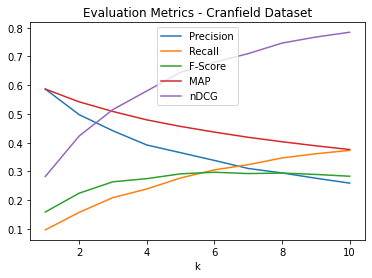

In [0]:
evaluate(vsa_cos_ngram_df, rel_df, 'VSA/COS-SIM/ngram/')

###### **VSA Jaccard Similarity**

In [0]:
# Load vsa jaccard retreived doc
vsa_jacc_unigram_df = load_data('VSA/JACC-SIM/unigram')
vsa_jacc_ngram_df = load_data('VSA/JACC-SIM/ngram')

vsa_jacc_unigram_df.shape, vsa_jacc_ngram_df.shape

((22500, 3), (22500, 3))

Precision, Recall and F-score @ 1 : 0.5022222222222222, 0.09028760383932793, 0.1468235070100206
MAP, nDCG @ 1 : 0.5022222222222222, 1 : 0.25113653770244904
Precision, Recall and F-score @ 2 : 0.44222222222222224, 0.15293619730631222, 0.21378882042964556
MAP, nDCG @ 2 : 0.4722222222222222, 2 : 0.413349290508045
Precision, Recall and F-score @ 3 : 0.391111111111111, 0.19134114611004413, 0.23941974550428477
MAP, nDCG @ 3 : 0.4451851851851854, 3 : 0.519011420769425
Precision, Recall and F-score @ 4 : 0.3622222222222222, 0.23214553127987891, 0.26206007587134944
MAP, nDCG @ 4 : 0.42444444444444424, 4 : 0.6072286397905962
Precision, Recall and F-score @ 5 : 0.3280000000000003, 0.25788428635196736, 0.2670213893951678
MAP, nDCG @ 5 : 0.4051555555555553, 5 : 0.6779436491759451
Precision, Recall and F-score @ 6 : 0.2955555555555555, 0.27454960433101083, 0.26317870489098605
MAP, nDCG @ 6 : 0.38688888888888856, 6 : 0.7156712567314769
Precision, Recall and F-score @ 7 : 0.27365079365079403, 0.293262

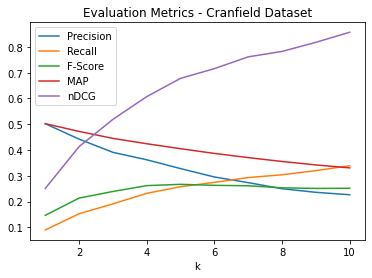

In [0]:
evaluate(vsa_jacc_unigram_df, rel_df, 'VSA/JACC-SIM/unigram/')

Precision, Recall and F-score @ 1 : 0.4711111111111111, 0.08364413619586031, 0.13611098496416518
MAP, nDCG @ 1 : 0.4711111111111111, 1 : 0.22417322747084992
Precision, Recall and F-score @ 2 : 0.4066666666666667, 0.1373680543381692, 0.19289170931031227
MAP, nDCG @ 2 : 0.4388888888888889, 2 : 0.3612875435872309
Precision, Recall and F-score @ 3 : 0.3614814814814814, 0.17632538409428217, 0.22059397965087105
MAP, nDCG @ 3 : 0.4130864197530866, 3 : 0.45828102331603243
Precision, Recall and F-score @ 4 : 0.3433333333333333, 0.21578986768621658, 0.24610652779499437
MAP, nDCG @ 4 : 0.395648148148148, 4 : 0.5589927686544689
Precision, Recall and F-score @ 5 : 0.3120000000000002, 0.24197222492029788, 0.252060440395003
MAP, nDCG @ 5 : 0.3789185185185185, 5 : 0.6237159369041642
Precision, Recall and F-score @ 6 : 0.2814814814814814, 0.25901647696455, 0.24997937881859492
MAP, nDCG @ 6 : 0.3626790123456785, 6 : 0.6733308943688738
Precision, Recall and F-score @ 7 : 0.25777777777777805, 0.2752848123

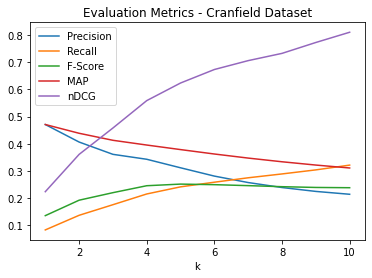

In [0]:
evaluate(vsa_jacc_ngram_df, rel_df, 'VSA/JACC-SIM/ngram/')

###### **ESA Cosine Similarity**

In [0]:
# Load esa cosine retreived doc
esa_cos_df = load_data('ESA/COS-SIM/n-1000')
esa_cos_df.shape

(22500, 3)

In [0]:
evaluate(esa_cos_df, rel_df, 'ESA/COS-SIM/')

###### **ESA Jaccard Similarity**

In [0]:
# Load esa jaccard retreived doc
esa_jacc_df = load_data('ESA/JACC-SIM/n-1000')
esa_jacc_df.shape

(22500, 3)

Precision, Recall and F-score @ 1 : 0.27111111111111114, 0.04639985721298484, 0.07590889212457838
MAP, nDCG @ 1 : 0.27111111111111114, 1 : 0.1285551058468648
Precision, Recall and F-score @ 2 : 0.22, 0.07402990494303258, 0.10367941321451754
MAP, nDCG @ 2 : 0.24555555555555555, 2 : 0.19689430533281954
Precision, Recall and F-score @ 3 : 0.19851851851851857, 0.10033739375052136, 0.12401512952132142
MAP, nDCG @ 3 : 0.22987654320987677, 3 : 0.25622179183641125
Precision, Recall and F-score @ 4 : 0.17555555555555555, 0.1146684739763384, 0.1286765323989111
MAP, nDCG @ 4 : 0.21629629629629643, 4 : 0.28858538925446425
Precision, Recall and F-score @ 5 : 0.16088888888888883, 0.12755041256673935, 0.1315543285996644
MAP, nDCG @ 5 : 0.2052148148148147, 5 : 0.32265195004337255
Precision, Recall and F-score @ 6 : 0.15629629629629638, 0.14354201926680835, 0.138515603991945
MAP, nDCG @ 6 : 0.19706172839506172, 6 : 0.36724524947993964
Precision, Recall and F-score @ 7 : 0.15111111111111095, 0.162452487

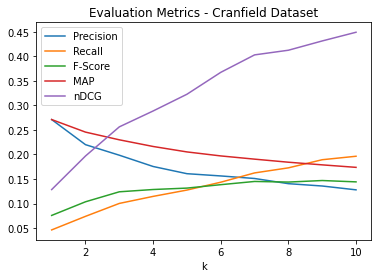

In [0]:
evaluate(esa_jacc_df, rel_df, 'ESA/JACC-SIM/n-1000/')

###### **FASTTEXT Soft Cosine Similarity**

In [0]:
# Load esa fasttext soft cosine retreived doc
fasttext_softcos_df = load_data('WordEmbedding/FASTTEXT/unigram/SOFT-COS-SIM') 
fasttext_softcos_df.shape

(22500, 3)

Precision, Recall and F-score @ 1 : 0.6222222222222222, 0.10429446650233097, 0.17152084280051247
MAP, nDCG @ 1 : 0.6222222222222222, 1 : 0.30472917760072754
Precision, Recall and F-score @ 2 : 0.5111111111111111, 0.16645312891271752, 0.23630490057317666
MAP, nDCG @ 2 : 0.5666666666666667, 2 : 0.4555034827506062
Precision, Recall and F-score @ 3 : 0.4296296296296296, 0.20407890569021855, 0.2575172981313838
MAP, nDCG @ 3 : 0.5209876543209879, 3 : 0.5263671788282744
Precision, Recall and F-score @ 4 : 0.37777777777777777, 0.22908755573098485, 0.26388766559630095
MAP, nDCG @ 4 : 0.48518518518518505, 4 : 0.5857636520519478
Precision, Recall and F-score @ 5 : 0.35111111111111176, 0.2660183596173101, 0.27947825607700855
MAP, nDCG @ 5 : 0.45837037037037004, 5 : 0.6469274442429754
Precision, Recall and F-score @ 6 : 0.3170370370370367, 0.28721677231572273, 0.2779190652119604
MAP, nDCG @ 6 : 0.4348148148148145, 6 : 0.6831012202420591
Precision, Recall and F-score @ 7 : 0.29777777777777814, 0.308

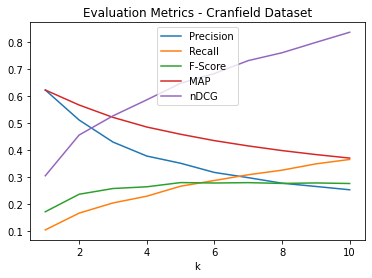

In [0]:
evaluate(fasttext_softcos_df, rel_df, 'WordEmbedding/FASTTEXT/unigram/SOFT-COS-SIM/')

###### **LSA Cosine Similarity**

In [0]:
# Load lsa cosine retreived doc
lsa_cos_unigram_df = load_data('LSA/COS-SIM/unigram/n-1000')
lsa_cos_ngram_df = load_data('LSA/COS-SIM/ngram/n-1000')

lsa_cos_unigram_df.shape, lsa_cos_ngram_df.shape

((22500, 3), (22500, 3))

Precision, Recall and F-score @ 1 : 0.6355555555555555, 0.10690975472288233, 0.1755961207434186
MAP, nDCG @ 1 : 0.6355555555555555, 1 : 0.30860109418993464
Precision, Recall and F-score @ 2 : 0.54, 0.17232363722182228, 0.24596072115056583
MAP, nDCG @ 2 : 0.5877777777777777, 2 : 0.47360217014262523
Precision, Recall and F-score @ 3 : 0.4533333333333335, 0.21340703785694715, 0.2703785287480323
MAP, nDCG @ 3 : 0.5429629629629631, 3 : 0.5511517603563891
Precision, Recall and F-score @ 4 : 0.4011111111111111, 0.24815457636467214, 0.2834933157259537
MAP, nDCG @ 4 : 0.5075000000000002, 4 : 0.6048270414448883
Precision, Recall and F-score @ 5 : 0.3582222222222228, 0.2726789784694665, 0.28547571177071757
MAP, nDCG @ 5 : 0.4776444444444438, 5 : 0.6600164244075335
Precision, Recall and F-score @ 6 : 0.334074074074074, 0.2987979285825344, 0.29018124431780634
MAP, nDCG @ 6 : 0.4537160493827156, 6 : 0.7069731631159978
Precision, Recall and F-score @ 7 : 0.3092063492063496, 0.31714477082411335, 0.288

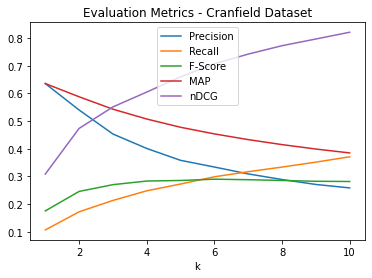

In [0]:
evaluate(lsa_cos_unigram_df, rel_df, 'LSA/COS-SIM/unigram/n-1000/')

Precision, Recall and F-score @ 1 : 0.5244444444444445, 0.08684304592810338, 0.1430519036945576
MAP, nDCG @ 1 : 0.5244444444444445, 1 : 0.24619709399108955
Precision, Recall and F-score @ 2 : 0.4577777777777778, 0.14638387736771777, 0.20806550071148583
MAP, nDCG @ 2 : 0.4911111111111111, 2 : 0.39427773687646434
Precision, Recall and F-score @ 3 : 0.38666666666666644, 0.1825528380366784, 0.23033310774117638
MAP, nDCG @ 3 : 0.4562962962962962, 3 : 0.46780095271718514
Precision, Recall and F-score @ 4 : 0.3611111111111111, 0.22607699544589338, 0.2568920588284524
MAP, nDCG @ 4 : 0.4324999999999998, 4 : 0.5533844663794011
Precision, Recall and F-score @ 5 : 0.3208888888888892, 0.24597201790231948, 0.2571202549812053
MAP, nDCG @ 5 : 0.4101777777777774, 5 : 0.5967836890738173
Precision, Recall and F-score @ 6 : 0.29185185185185186, 0.26539119748816575, 0.2561965706525262
MAP, nDCG @ 6 : 0.3904567901234565, 6 : 0.6318412722437159
Precision, Recall and F-score @ 7 : 0.26920634920634945, 0.28120

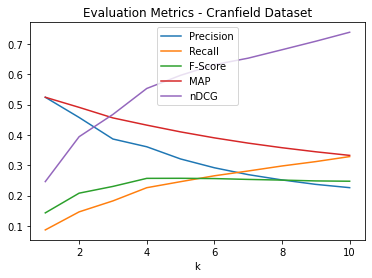

In [0]:
evaluate(lsa_cos_ngram_df, rel_df, 'LSA/COS-SIM/ngram/n-1000/')

###### **LSA Jaccard Similarity**

In [0]:
# Load lsa jaccard retreived doc
lsa_jacc_unigram_df = load_data('LSA/JACC-SIM/unigram/n-1000')
lsa_jacc_ngram_df = load_data('LSA/JACC-SIM/ngram/n-1000')

lsa_jacc_unigram_df.shape, lsa_jacc_ngram_df.shape

((22500, 3), (22500, 3))

Precision, Recall and F-score @ 1 : 0.008888888888888889, 0.0016296296296296297, 0.0027513227513227515
MAP, nDCG @ 1 : 0.008888888888888889, 1 : 0.0
Precision, Recall and F-score @ 2 : 0.0044444444444444444, 0.0016296296296296297, 0.002380952380952381
MAP, nDCG @ 2 : 0.006666666666666667, 2 : 0.0
Precision, Recall and F-score @ 3 : 0.008888888888888887, 0.0035447022113688784, 0.004967711301044634
MAP, nDCG @ 3 : 0.007407407407407407, 3 : 0.0
Precision, Recall and F-score @ 4 : 0.0077777777777777776, 0.004433591100257767, 0.005513835474619788
MAP, nDCG @ 4 : 0.007499999999999999, 4 : 0.000713811145929217
Precision, Recall and F-score @ 5 : 0.007111111111111111, 0.004878035544702211, 0.005640532307198974
MAP, nDCG @ 5 : 0.0074222222222222215, 5 : 0.000713811145929217
Precision, Recall and F-score @ 6 : 0.007407407407407407, 0.005549640482973816, 0.006091533945523758
MAP, nDCG @ 6 : 0.007419753086419751, 6 : 0.0008972165879578827
Precision, Recall and F-score @ 7 : 0.009523809523809521, 0

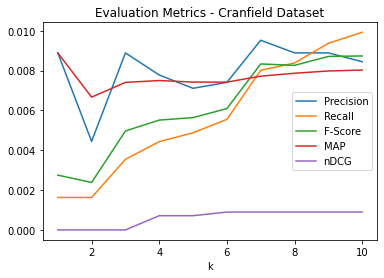

In [0]:
evaluate(lsa_jacc_unigram_df, rel_df, 'LSA/JACC-SIM/unigram/n-1000/')

Precision, Recall and F-score @ 1 : 0.008888888888888889, 0.0009876543209876543, 0.0017777777777777776
MAP, nDCG @ 1 : 0.008888888888888889, 1 : 0.0
Precision, Recall and F-score @ 2 : 0.006666666666666667, 0.0013916947250280584, 0.0022999222999222995
MAP, nDCG @ 2 : 0.0077777777777777776, 2 : 0.0
Precision, Recall and F-score @ 3 : 0.005925925925925926, 0.0015028058361391695, 0.002323120462655346
MAP, nDCG @ 3 : 0.007160493827160493, 3 : 0.0
Precision, Recall and F-score @ 4 : 0.005555555555555556, 0.001637485970819304, 0.002402374402374402
MAP, nDCG @ 4 : 0.006759259259259258, 4 : 0.0
Precision, Recall and F-score @ 5 : 0.0044444444444444444, 0.001637485970819304, 0.0022568458182493276
MAP, nDCG @ 5 : 0.0062962962962962955, 5 : 0.0
Precision, Recall and F-score @ 6 : 0.004444444444444444, 0.0025263748597081936, 0.0029372987531555306
MAP, nDCG @ 6 : 0.005987654320987653, 6 : 0.0
Precision, Recall and F-score @ 7 : 0.0038095238095238087, 0.0025263748597081936, 0.0027570265300761753
MAP

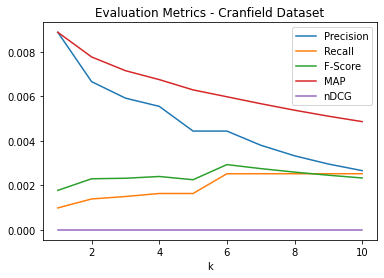

In [0]:
evaluate(lsa_jacc_ngram_df, rel_df, 'LSA/JACC-SIM/ngram/n-1000/')

###### **LDA Cosine Similarity**

In [0]:
# Load lda cosine retreived doc
lda_cos_unigram_df = load_data('LDA/COS-SIM/unigram/n-1000')
#lda_cos_ngram_df = load_data('LDA/COS-SIM/ngram/n-1000')

lda_cos_unigram_df.shape#, lda_cos_ngram_df.shape

(22500, 3)

In [0]:
evaluate(lda_cos_unigram_df, rel_df, 'LDA/COS-SIM/unigram/n-1000/')

In [0]:
#evaluate(lda_cos_ngram_df, rel_df, 'LDA/COS-SIM/ngram/n-1000/')

###### **LDA Jaccard Similarity**

In [0]:
# Load lda jaccard retreived doc
lda_jacc_unigram_df = load_data('LDA/JACC-SIM/unigram/n-1000')
lda_jacc_ngram_df = load_data('LDA/JACC-SIM/ngram/n-1000')

lda_jacc_unigram_df.shape, lda_jacc_ngram_df.shape

In [0]:
evaluate(lda_jacc_unigram_df, rel_df, 'LDA/JACC-SIM/unigram/n-1000/')

In [0]:
evaluate(lda_jacc_ngram_df, rel_df, 'LDA/JACC-SIM/ngram/n-1000/')

###### **BM25 Similarity**

In [0]:
# Load BM25 retreived doc
bm25_unigram_df = load_data('BM25/SIM/unigram')
bm25_ngram_df = load_data('BM25/SIM/ngram')

bm25_unigram_df.shape, bm25_ngram_df.shape

((22500, 3), (22500, 3))

Precision, Recall and F-score @ 1 : 0.7066666666666667, 0.12124512051903236, 0.19876276073874805
MAP, nDCG @ 1 : 0.7066666666666667, 1 : 0.3734594691865062
Precision, Recall and F-score @ 2 : 0.5911111111111111, 0.19333074258444885, 0.27376986587199126
MAP, nDCG @ 2 : 0.6488888888888888, 2 : 0.5227382783064274
Precision, Recall and F-score @ 3 : 0.5333333333333332, 0.2567287674479236, 0.3224007373233884
MAP, nDCG @ 3 : 0.6103703703703707, 3 : 0.6344695223056409
Precision, Recall and F-score @ 4 : 0.4777777777777778, 0.29659826404953643, 0.33950876051717177
MAP, nDCG @ 4 : 0.577222222222222, 4 : 0.7024276954075153
Precision, Recall and F-score @ 5 : 0.4391111111111113, 0.3375923207324477, 0.3537590422174441
MAP, nDCG @ 5 : 0.5495999999999996, 5 : 0.7670278261249575
Precision, Recall and F-score @ 6 : 0.4037037037037037, 0.36419196857915415, 0.3547537936562404
MAP, nDCG @ 6 : 0.5252839506172842, 6 : 0.8209720509177482
Precision, Recall and F-score @ 7 : 0.37587301587301625, 0.38971443404

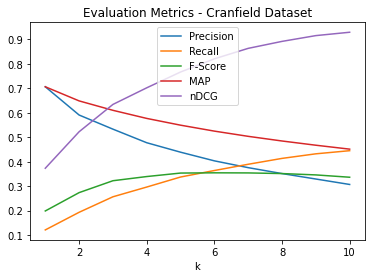

In [0]:
evaluate(bm25_unigram_df, rel_df, 'BM25/SIM/unigram/')

Precision, Recall and F-score @ 1 : 0.6133333333333333, 0.10164277841669034, 0.16712402547256172
MAP, nDCG @ 1 : 0.6133333333333333, 1 : 0.29849328781629053
Precision, Recall and F-score @ 2 : 0.5111111111111111, 0.16270836411439238, 0.23205120912581473
MAP, nDCG @ 2 : 0.5622222222222222, 2 : 0.4369279198230313
Precision, Recall and F-score @ 3 : 0.46814814814814815, 0.21825693368981516, 0.2779810574866492
MAP, nDCG @ 3 : 0.5308641975308646, 3 : 0.5464296148180918
Precision, Recall and F-score @ 4 : 0.43, 0.2662094133089614, 0.3057683321435915
MAP, nDCG @ 4 : 0.5056481481481482, 4 : 0.622870888131522
Precision, Recall and F-score @ 5 : 0.3884444444444447, 0.2975812680462659, 0.3125137232758714
MAP, nDCG @ 5 : 0.4822074074074068, 5 : 0.6736011392850542
Precision, Recall and F-score @ 6 : 0.35703703703703693, 0.32274143323854726, 0.31386014024305187
MAP, nDCG @ 6 : 0.4613456790123454, 6 : 0.7150939351948588
Precision, Recall and F-score @ 7 : 0.3301587301587302, 0.34791683808061874, 0.31

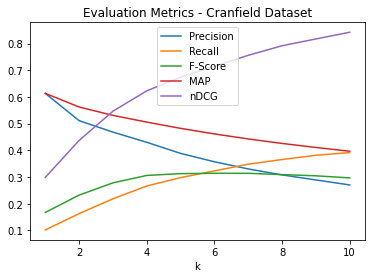

In [0]:
evaluate(bm25_ngram_df, rel_df, 'BM25/SIM/ngram/')

# **Hypothesis Testing**

-----

In [0]:
# seed the random number generator
seed(1)

#### **Student's Paired T-Test**

In [0]:
# Student's t-test
def ttest(data1, data2):
    stat, p = ttest_ind(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

#### **Wilcoxon Signed Ranks Test**

In [0]:
# Wilcoxon signed-rank test
def wilcoxon_test(data1, data2):
    stat, p = wilcoxon(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

#### **Create Dataset for hypothesis testing**

In [0]:
def generate_data(retreived, relevant, k):

    recalls, fscores, APs = [], [], []
    query_ids = retreived['query_num'].unique()

    for query_id in tqdm(query_ids):
        true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values
        pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values

        recalls.append(queryRecall(pred_doc_IDs, true_doc_IDs, k))
        fscores.append(queryFscore(pred_doc_IDs, true_doc_IDs, k))
        APs.append(queryAveragePrecision(pred_doc_IDs, true_doc_IDs, k))

    return [recalls, fscores, APs]

#### **Compare Models for K = 5**

In [0]:
data1 = generate_data(vsa_cos_unigram_df, rel_df, 5)
data2 = generate_data(esa_cos_df, rel_df, 5)
data3 = generate_data(lsa_cos_unigram_df, rel_df, 5)
data4 = generate_data(fasttext_softcos_df, rel_df, 5)
data5 = generate_data(bm25_unigram_df, rel_df, 5)

100%|██████████| 225/225 [00:00<00:00, 642.19it/s]


###### **Standard Deviation Values for F-Test**

In [0]:
sigma1 = statistics.pstdev(data1[2])
sigma2 = statistics.pstdev(data2[2])
sigma3 = statistics.pstdev(data3[2])
sigma4 = statistics.pstdev(data4[2])
sigma5 = statistics.pstdev(data5[2])

In [0]:
print(sigma1, sigma2, sigma3, sigma4, sigma5)

0.3192053081509057 0.31262150682493434 0.30830421404038855 0.30937246098499493 0.2998450431081748


###### **Histogram Graph to check for normal distribution**

In [0]:
sns.set_style("white")

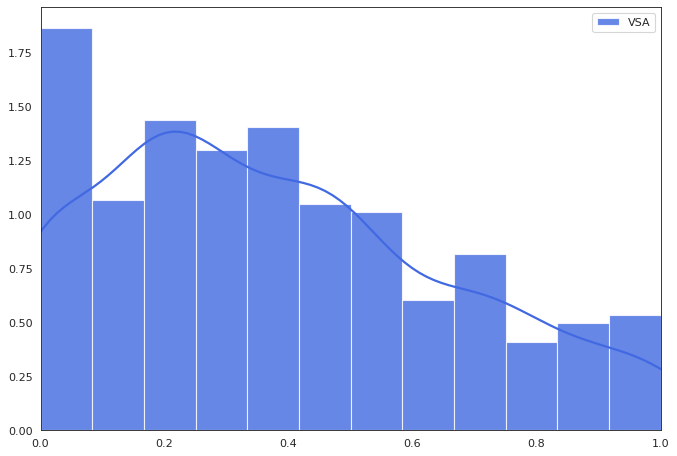

In [0]:
# VSA Histogram Plot
kwargs = dict(hist_kws={'alpha':0.8}, kde_kws={'linewidth':2})
plt.figure(figsize = (10,7), dpi = 80)
sns.distplot(data1, color = "royalblue", label = "VSA", **kwargs)

plt.xlim(0, 1)
plt.legend();

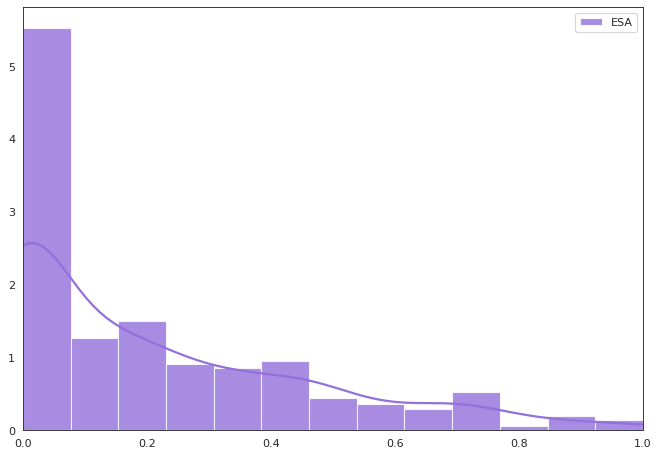

In [0]:
# ESA Histogram Plot
kwargs = dict(hist_kws={'alpha':0.8}, kde_kws={'linewidth':2})
plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(data2, color = "mediumpurple", label = "ESA", **kwargs)

plt.xlim(0, 1)
plt.legend();

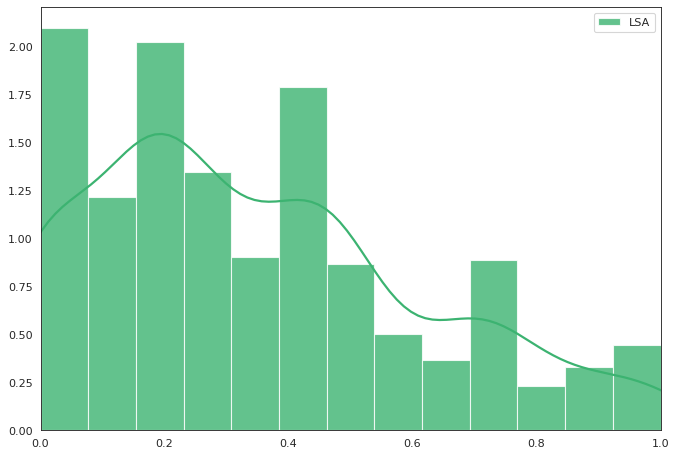

In [0]:
# LSA Histogram Plot
kwargs = dict(hist_kws={'alpha':0.8}, kde_kws={'linewidth':2})
plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(data3, color = "mediumseagreen", label = "LSA", **kwargs)

plt.xlim(0, 1)
plt.legend();

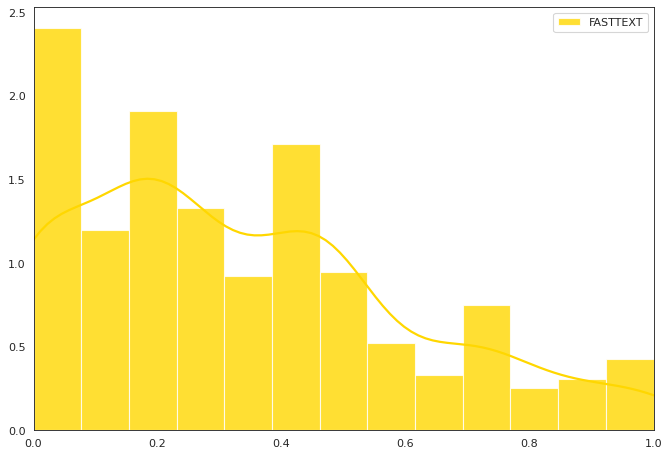

In [0]:
# FASTTEXT Histogram Plot
kwargs = dict(hist_kws={'alpha':0.8}, kde_kws={'linewidth':2})
plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(data4, color = "gold", label = "FASTTEXT", **kwargs)

plt.xlim(0, 1)
plt.legend();

In [0]:
# BM25 Histogram Plot
kwargs = dict(hist_kws={'alpha':0.8}, kde_kws={'linewidth':2})
plt.figure(figsize = (10, 7), dpi = 80)
sns.distplot(data5, color = "sandybrown", label = "BM25", **kwargs)

plt.xlim(0, 1)
plt.legend();

###### **T-Test**

In [0]:
ttest(data1[2], data2[2])

Statistics=7.613, p=0.000


In [0]:
ttest(data1[2], data3[2])

Statistics=0.999, p=0.318


In [0]:
ttest(data1[2], data4[2])

Statistics=1.670, p=0.096


In [0]:
ttest(data1[2], data5[2])

Statistics=-1.423, p=0.156


In [0]:
ttest(data2[2], data3[2])

Statistics=-6.746, p=0.000


In [0]:
ttest(data2[2], data4[2])

Statistics=-6.046, p=0.000


In [0]:
ttest(data2[2], data5[2])

Statistics=-9.291, p=0.000


In [0]:
ttest(data3[2], data4[2])

Statistics=0.687, p=0.493


In [0]:
ttest(data3[2], data5[2])

Statistics=-2.481, p=0.013


In [0]:
ttest(data4[2], data5[2])

Statistics=-3.169, p=0.002


###### **Wilcoxon Test**

In [0]:
wilcoxon_test(data1[2], data2[2])

Statistics=2199.500, p=0.000


In [0]:
wilcoxon_test(data1[2], data3[2])

Statistics=5236.500, p=0.022


In [0]:
wilcoxon_test(data1[2], data4[2])

Statistics=4599.000, p=0.001


In [0]:
wilcoxon_test(data1[2], data5[2])

Statistics=3516.500, p=0.000


In [0]:
wilcoxon_test(data2[2], data3[2])

Statistics=2397.500, p=0.000


In [0]:
wilcoxon_test(data2[2], data4[2])

Statistics=2729.500, p=0.000


In [0]:
wilcoxon_test(data2[2], data5[2])

Statistics=1686.500, p=0.000


In [0]:
wilcoxon_test(data3[2], data4[2])

Statistics=3516.000, p=0.025


In [0]:
wilcoxon_test(data3[2], data5[2])

Statistics=4564.500, p=0.000


In [0]:
wilcoxon_test(data4[2], data5[2])

Statistics=3948.500, p=0.000


# **Correlation**

#### **Create Dataset**

In [0]:
def generate_docID(retreived, relevant, k, query_id):

    true_doc_IDs = relevant[relevant['query_num'] == query_id]['id'].values[:k]
    pred_doc_IDs = retreived[retreived['query_num'] == query_id]['id'].values[:k]

    return true_doc_IDs, pred_doc_IDs

#### **Compute Correlation**

In [0]:
k_len, q = 5, 1

###### **VSA**

In [0]:
# Compute correlation between VSA and true label
ref_data1, data1 = generate_docID(vsa_cos_df, rel_df, k_len, q)
corr1 = pearsonr(ref_data1, data1)
corr1

(0.8847355326110558, 0.046155354446017795)

In [0]:
# Compute mean correlation between VSA and true label
corr1, p_value1 = [], []
for q_id in tqdm(vsa_cos_df['query_num'].unique()):
  
    ref_data1, data1 = generate_docID(vsa_cos_df, rel_df, k_len, q_id)
    if (ref_data1.shape[0] >= k_len):
        c = pearsonr(ref_data1, data1)
        corr1.append(c[0])
        p_value1.append(c[1])

100%|██████████| 225/225 [00:00<00:00, 724.50it/s]


In [0]:
statistics.mean(corr1), statistics.stdev(corr1)

(0.031361659824128876, 0.5061922504971327)

###### **ESA**

In [0]:
# Compute correlation between ESA and true label
ref_data2, data2 = generate_docID(esa_cos_df, rel_df, k_len, q)
corr2 = pearsonr(ref_data2, data2)
corr2

(-0.6494225205259732, 0.2356337525569853)

In [0]:
ref_data2

array([486, 184,  29,  31,  57])

In [0]:
data2

array([  12,  195,  658, 1111,  141])

In [0]:
# Compute mean correlation between ESA and true label
corr2, p_value2 = [], []
for q_id in tqdm(esa_cos_df['query_num'].unique()):
  
    ref_data2, data2 = generate_docID(esa_cos_df, rel_df, k_len, q_id)
    if (ref_data2.shape[0] >= k_len):
        c = pearsonr(ref_data2, data2)
        corr2.append(c[0])
        p_value2.append(c[1])

100%|██████████| 225/225 [00:00<00:00, 772.77it/s]


In [0]:
statistics.mean(corr2), statistics.stdev(corr2)

(0.07562834048330769, 0.5306488610437381)

###### **LSA**

In [0]:
# Compute correlation between LSA and true label
ref_data3, data3 = generate_docID(lsa_cos_df, rel_df, k_len, q)
corr3 = pearsonr(ref_data3, data3)
corr3

(-0.18808188326929787, 0.7619461830881614)

In [0]:
# Compute mean correlation between LSA and true label
corr3, p_value3 = [], []
for q_id in tqdm(lsa_cos_df['query_num'].unique()):
  
    ref_data3, data3 = generate_docID(lsa_cos_df, rel_df, k_len, q_id)
    if (ref_data3.shape[0] >= k_len):
        c = pearsonr(ref_data3, data3)
        corr3.append(c[0])
        p_value3.append(c[1])

100%|██████████| 225/225 [00:00<00:00, 782.87it/s]


In [0]:
statistics.mean(corr3), statistics.stdev(corr3)

(-0.005496176738233054, 0.5292802459967679)

###### **FASTTEXT**

In [0]:
# Compute correlation between FASTTEXT and true label
ref_data4, data4 = generate_docID(esa_softcos_df, rel_df, k_len, q)
corr4 = pearsonr(ref_data4, data4)
corr4

(-0.36082522881357837, 0.5507563611039913)

In [0]:
# Compute mean correlation between LSA and true label
corr4, p_value4 = [], []
for q_id in tqdm(esa_softcos_df['query_num'].unique()):
  
    ref_data4, data4 = generate_docID(esa_softcos_df, rel_df, k_len, q_id)
    if (ref_data4.shape[0] >= k_len):
        c = pearsonr(ref_data4, data4)
        corr4.append(c[0])
        p_value4.append(c[1])

100%|██████████| 225/225 [00:00<00:00, 694.69it/s]


In [0]:
statistics.mean(corr4), statistics.stdev(corr4)

(0.03767714734100888, 0.5094735903683689)

###### **BM25**

In [0]:
# Compute correlation between BM25 and true label
ref_data5, data5 = generate_docID(bm25_df, rel_df, k_len, q)
corr5 = pearsonr(ref_data5, data5)
corr5

(0.9793380817200626, 0.003554178390987545)

In [0]:
# Compute mean correlation between LSA and true label
corr5, p_value5 = [], []
for q_id in tqdm(bm25_df['query_num'].unique()):
  
    ref_data5, data5 = generate_docID(bm25_df, rel_df, k_len, q_id)
    if (ref_data5.shape[0] >= k_len):
        c = pearsonr(ref_data5, data5)
        corr5.append(c[0])
        p_value5.append(c[1])

100%|██████████| 225/225 [00:00<00:00, 769.65it/s]


In [0]:
statistics.mean(corr5), statistics.stdev(corr5)

(0.05567867270472826, 0.5284445527114284)